# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [2]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [3]:
df = rcr('adult.csv')
p(df)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
pd.options.display.max_info_columns = 999
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


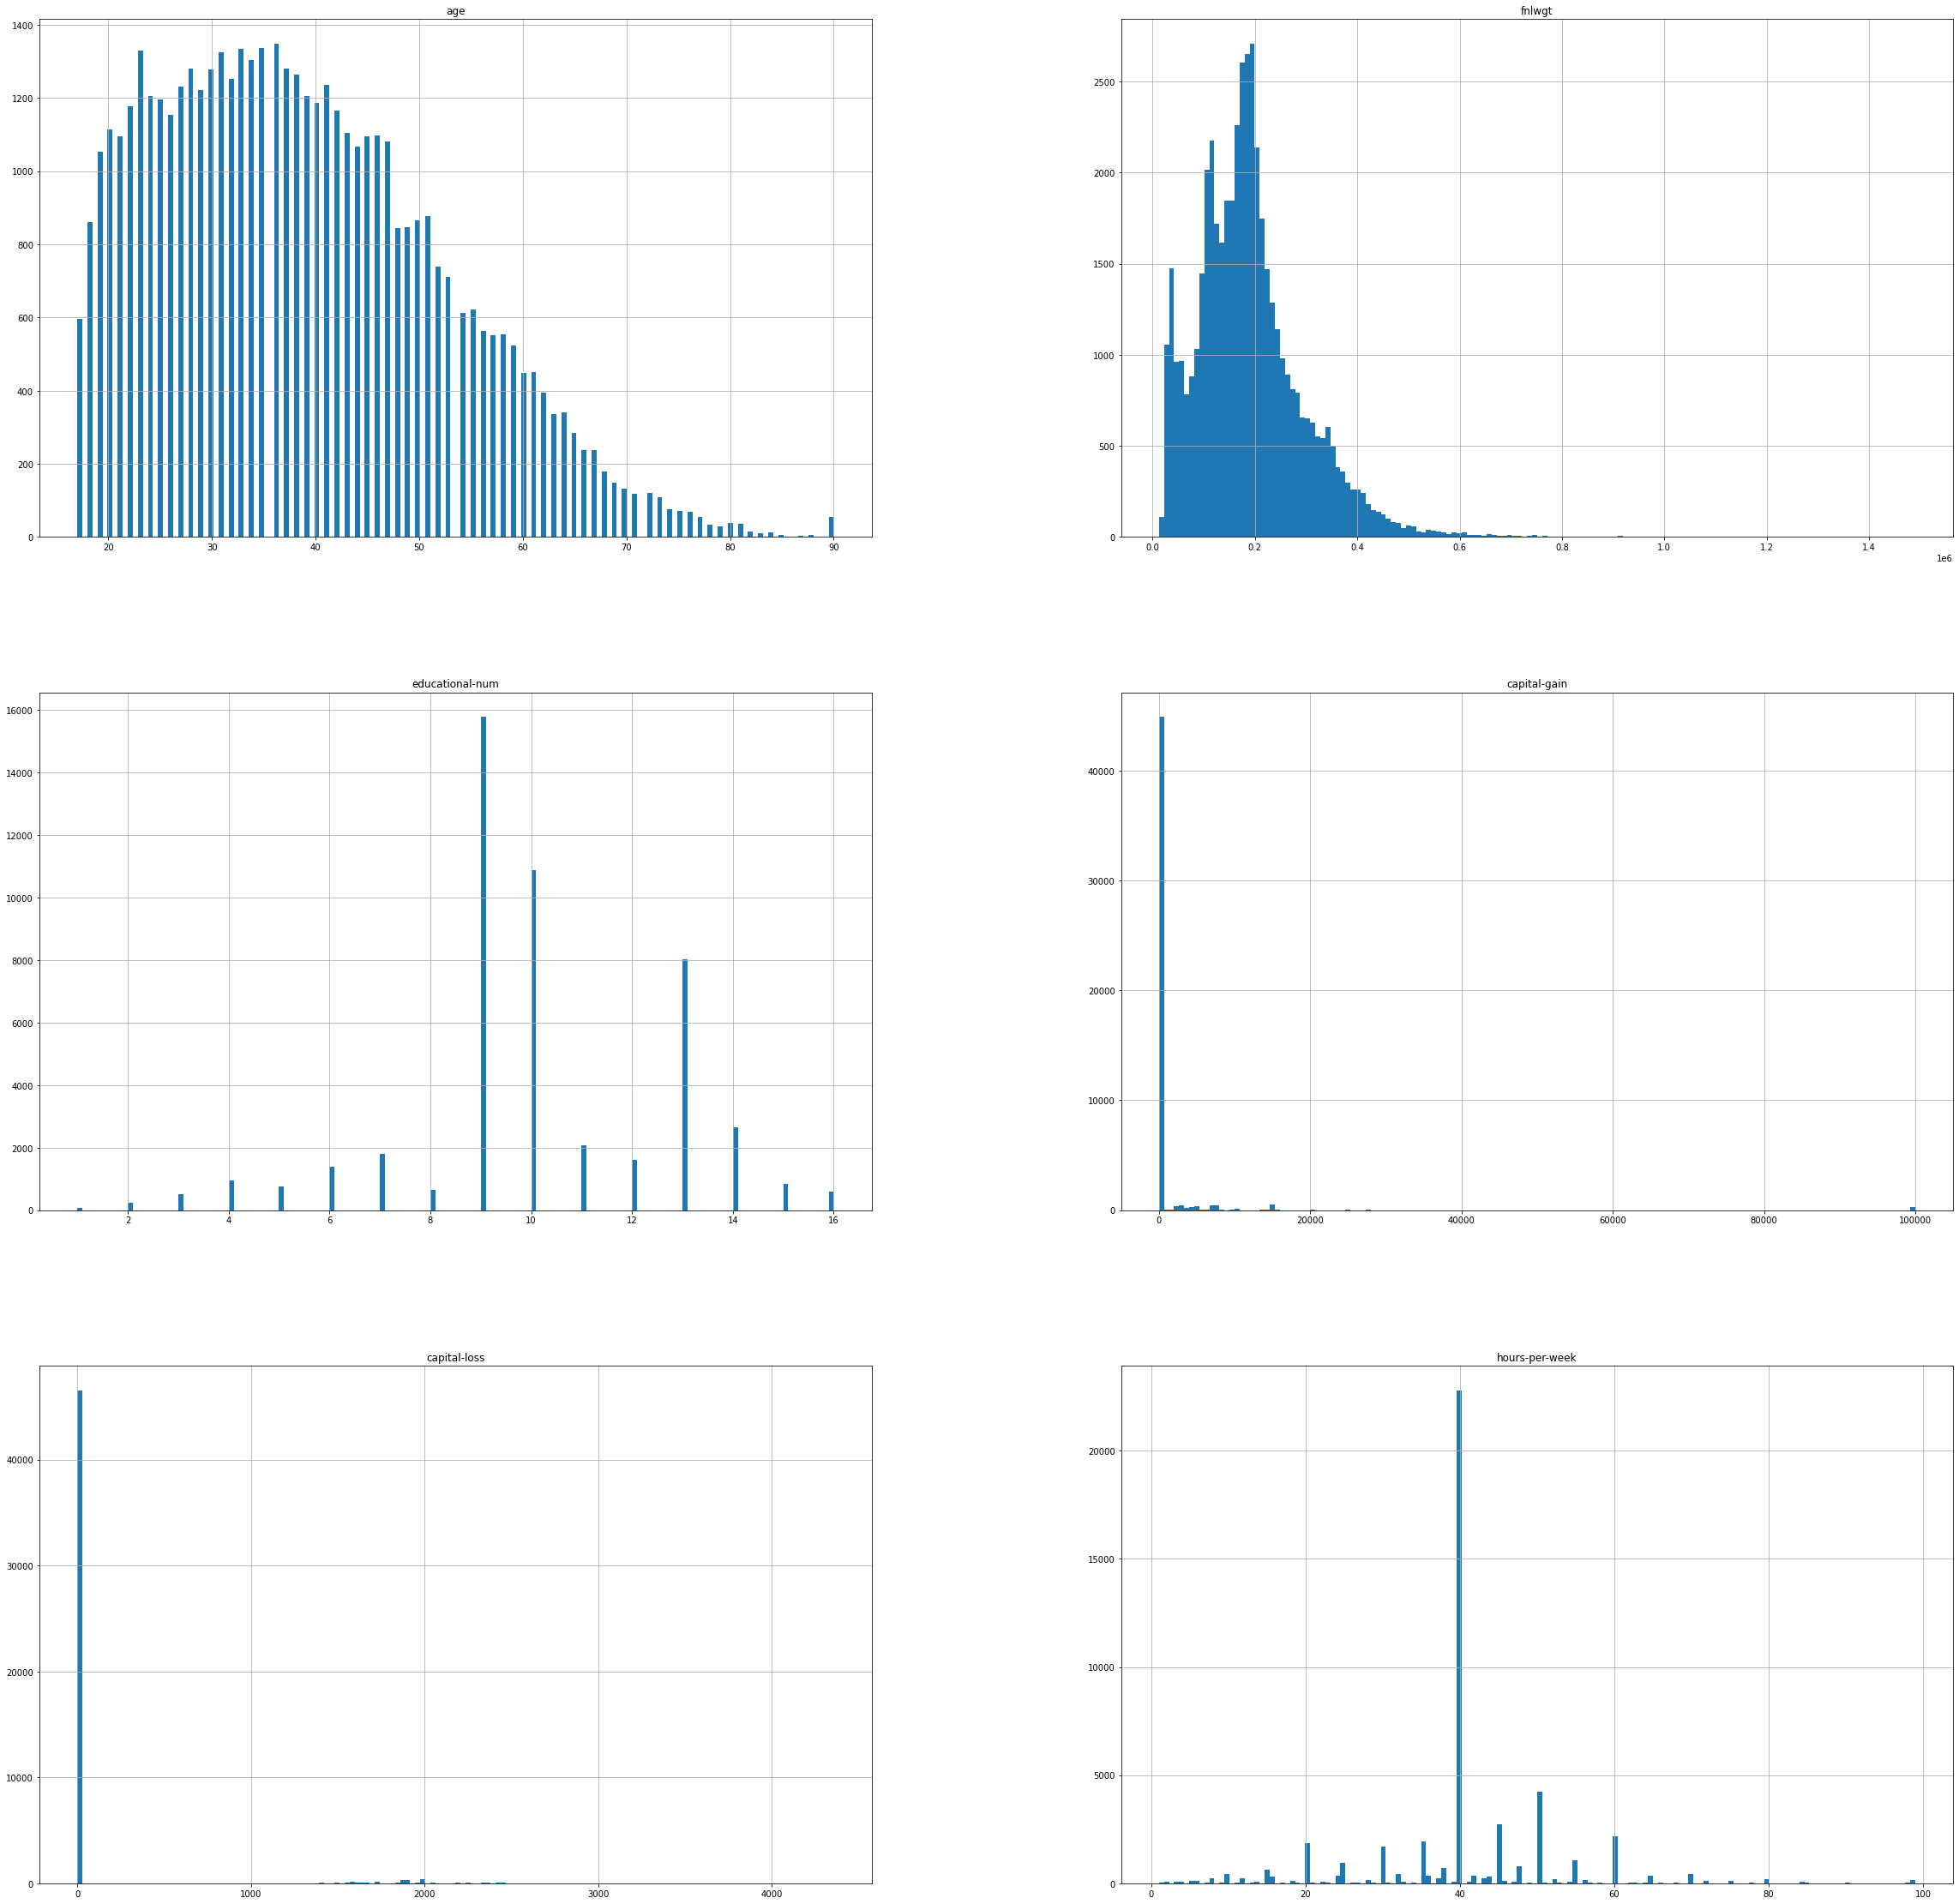

In [6]:
#grid of hist here
hist = df.hist(bins=150,figsize =(40,40))

In [7]:
#select categorical variables only
df_categoricals = df.select_dtypes(include = 'object').copy()
p(df_categoricals)

(48842, 9)


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K
48841,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,>50K


In [8]:
column_names_categorical_list = list(df_categoricals.columns)
column_names_categorical_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [9]:
column_names_categorical_list_len = len(column_names_categorical_list)
i = 0

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


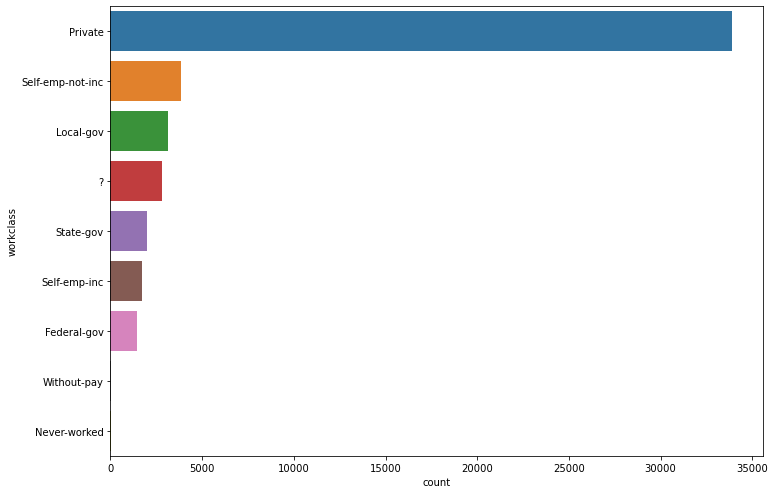

In [10]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


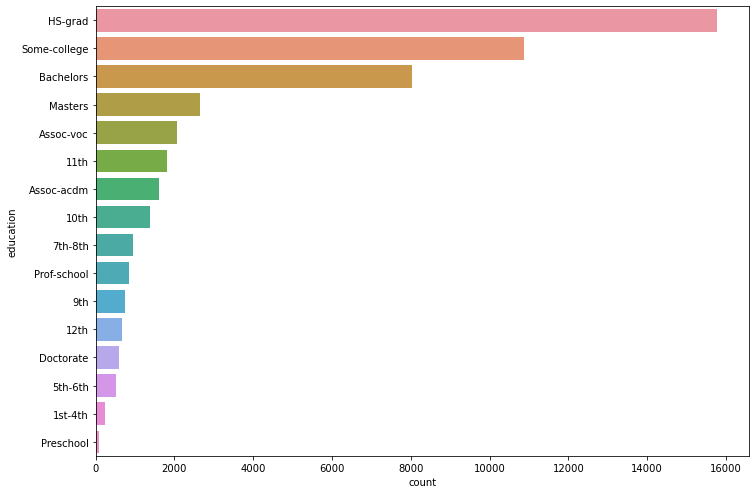

In [11]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


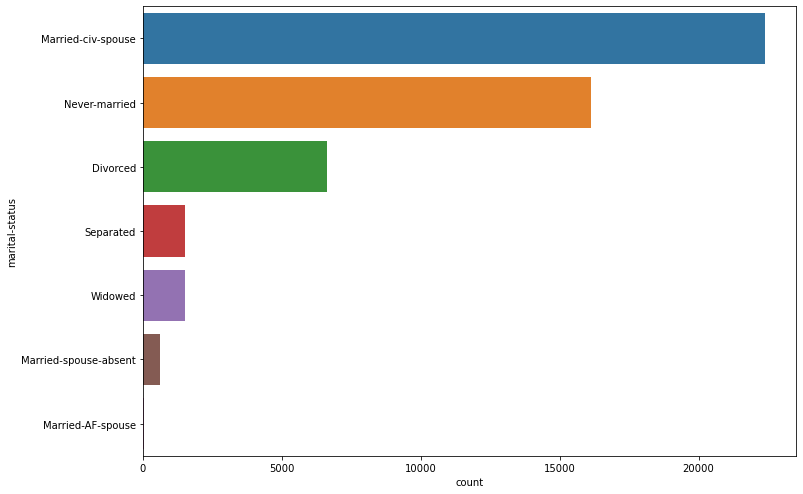

In [12]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


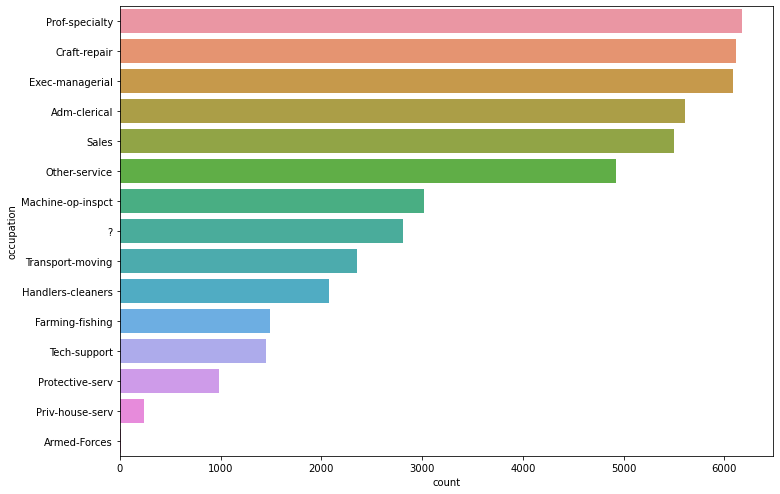

In [13]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


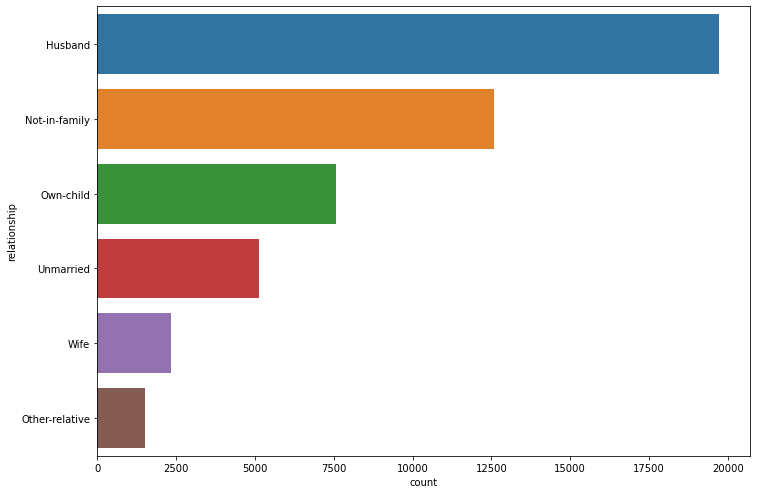

In [14]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


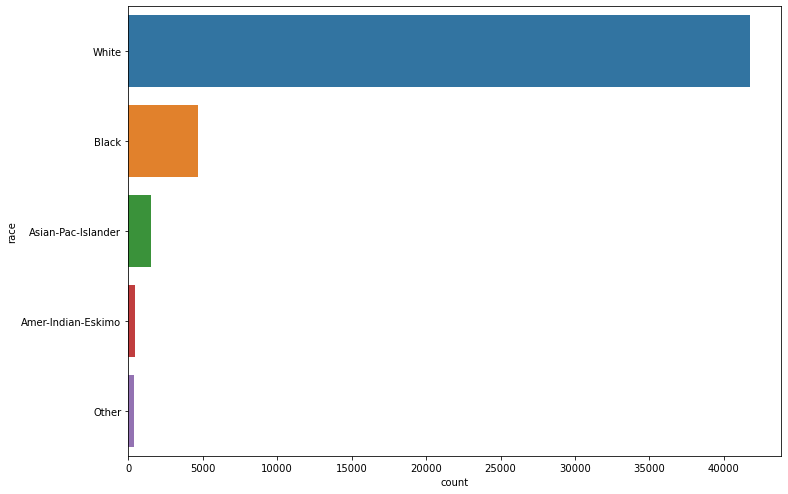

In [15]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

Male      32650
Female    16192
Name: gender, dtype: int64


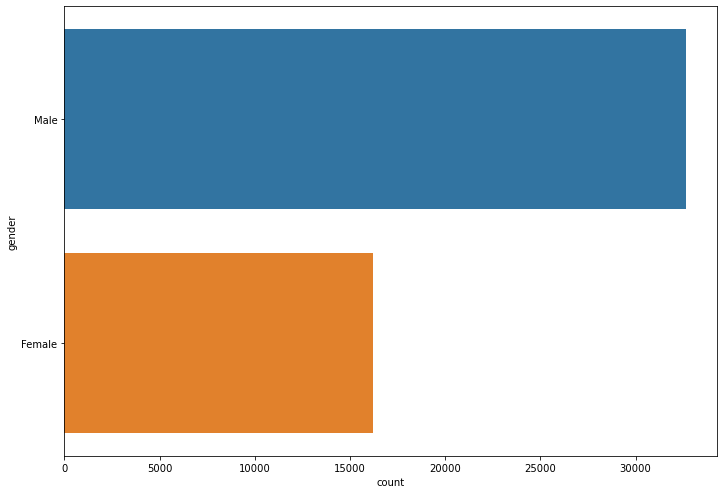

In [16]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

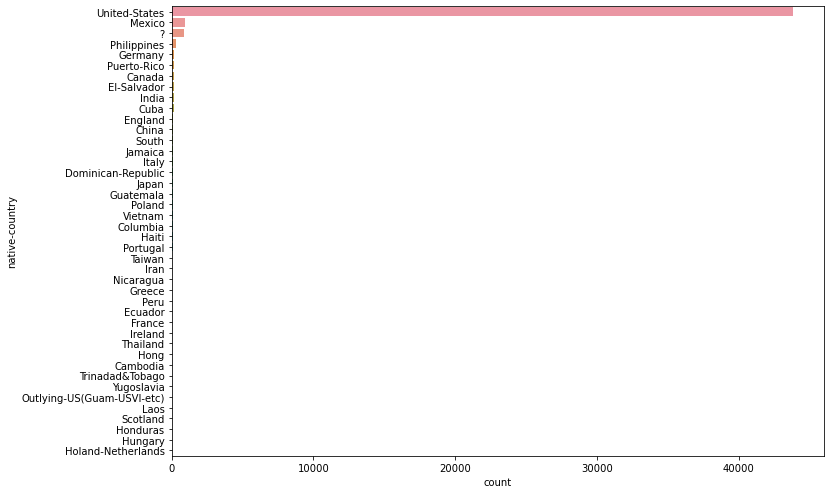

In [17]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

<=50K    37155
>50K     11687
Name: income, dtype: int64


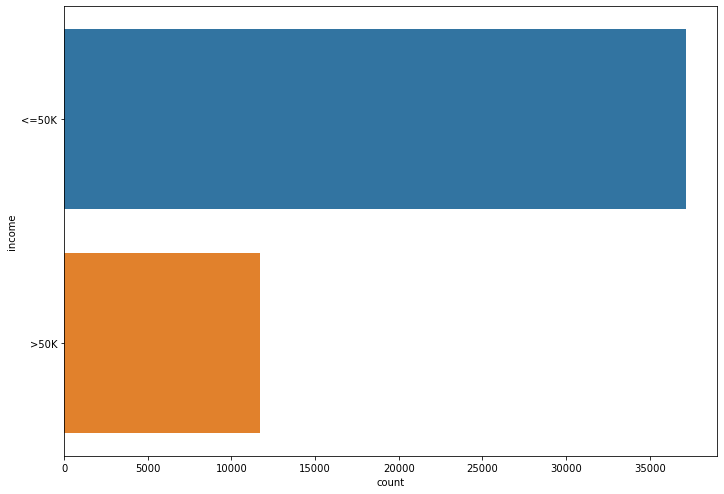

In [18]:
if (i < column_names_categorical_list_len):
    #get counts of each variable value
    print(df_categoricals[column_names_categorical_list[i]].value_counts())
    #count plot for one variable
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.countplot(data = df_categoricals,
                  y = column_names_categorical_list[i],
                  ax = ax,
                  order = df_categoricals[column_names_categorical_list[i]].value_counts().index)
    i = i + 1

In [19]:
df_numerics = df.select_dtypes('number')
p(df_numerics)

(48842, 6)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20
48841,52,287927,9,15024,0,40


In [20]:
column_name_numeric_list = list(df_numerics.columns)
column_name_numeric_list

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [21]:
'''import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,3, figsize=(8, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

fig.subplots_adjust(left=0.08*1.1, right=0.98*1.1, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

axs = axs.ravel()

for i in range(94):
    axs[i].boxplot(df_numerics[column_name_numeric_list[i]])
    axs[i].set_title(column_name_numeric_list[i])'''

"import matplotlib.pyplot as plt\nimport numpy as np\n\nfig, axs = plt.subplots(2,3, figsize=(8, 8), facecolor='w', edgecolor='k')\nfig.subplots_adjust(hspace = .5, wspace=.001)\n\nfig.subplots_adjust(left=0.08*1.1, right=0.98*1.1, bottom=0.05, top=0.9,\n                    hspace=0.4, wspace=0.3)\n\naxs = axs.ravel()\n\nfor i in range(94):\n    axs[i].boxplot(df_numerics[column_name_numeric_list[i]])\n    axs[i].set_title(column_name_numeric_list[i])"

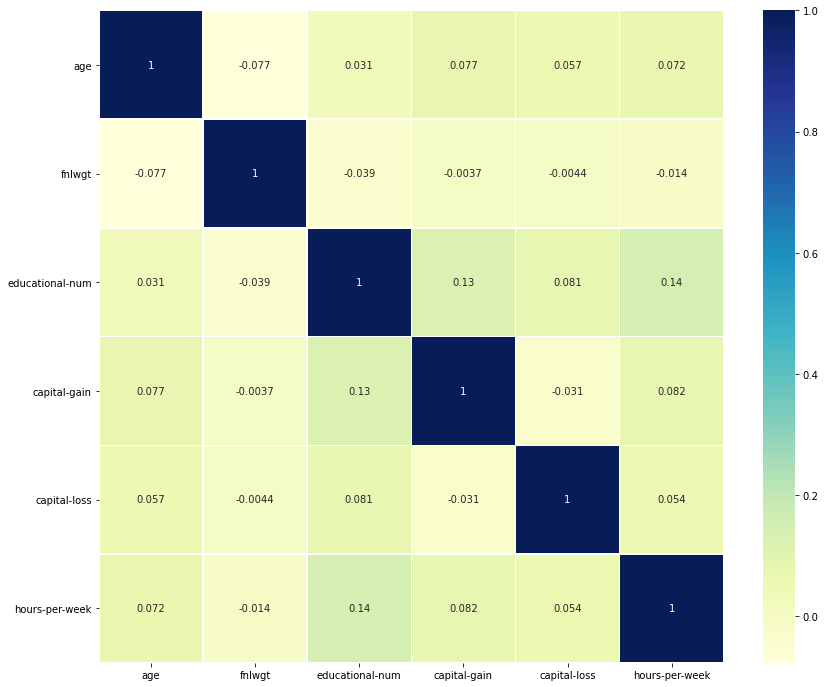

In [22]:

#create the correlation matrix heat map
scl = 1 ###########<<<<<<<<<<<
dim = (14*scl,12*scl)
plt.figure(figsize=dim)
sns.heatmap(df.corr(),linewidths=.6,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

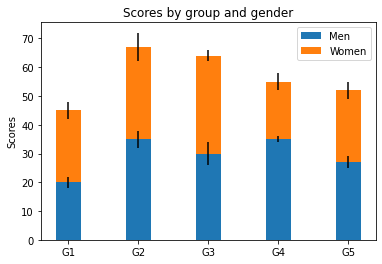

In [23]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [25]:
df_plot = df.groupby(['income','race']).size().reset_index().pivot(columns='income', index='race', values=0)

<AxesSubplot:xlabel='race'>

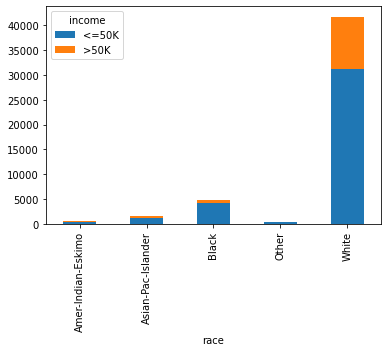

In [26]:
df_plot.plot(kind='bar', stacked=True)

income              <=50K   >50K
race                            
Amer-Indian-Eskimo    415     55
Asian-Pac-Islander   1110    409
Black                4119    566
Other                 356     50
White               31155  10607


<AxesSubplot:title={'center':'Stacked Bar Graph'}, ylabel='race'>

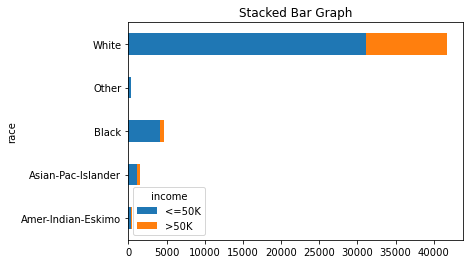

In [27]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
  
# load dataset
  
# view dataset
print(df_plot)
  
# plot a Stacked Bar Chart using matplotlib
df_plot.reset_index().plot(
    x = 'race',
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [28]:
df_plot = df_plot.reset_index()

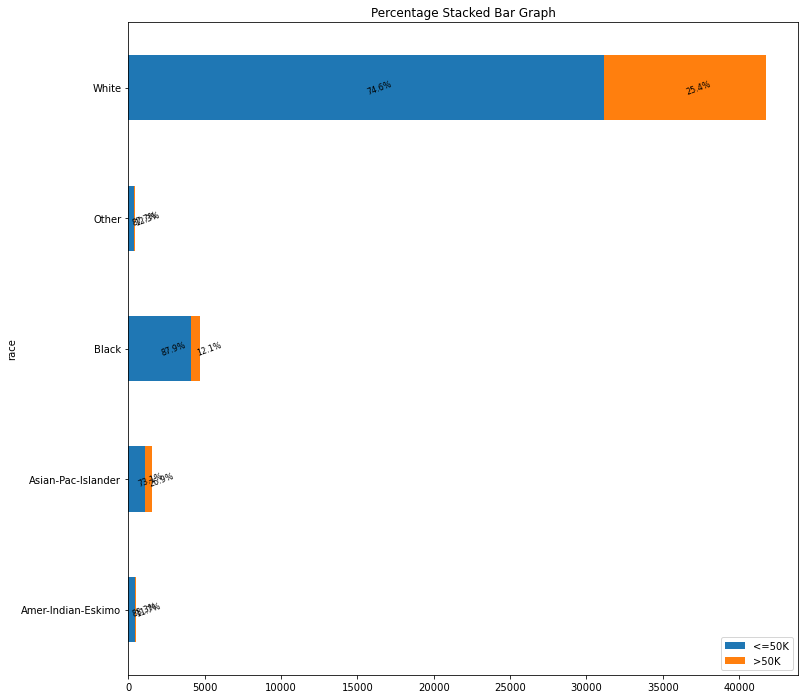

In [29]:
# plot a Stacked Bar Chart using matplotlib
df_plot.plot(
  x = 'race', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True,
  figsize=(12,12)).legend(loc='lower right')
  
df_total = df_plot[">50K"] + df_plot["<=50K"]
df_rel = df_plot[df_plot.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_plot.iloc[:, 1:].cumsum(1)[n], 
                                         df_plot[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'left', rotation = 20, fontsize = 8)
        
#https://www.geeksforgeeks.org/stacked-percentage-bar-plot-in-matplotlib/

<AxesSubplot:xlabel='income'>

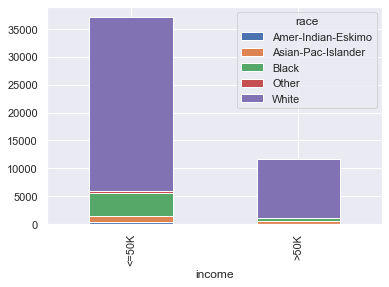

In [30]:
import seaborn as sns
sns.set()
df_plot.set_index('race').T.plot(kind='bar', stacked=True)

In [31]:
df_plot = df.groupby(['income','race']).size().reset_index().pivot(columns='race', index='income', values=0)
df_plot

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,415,1110,4119,356,31155
>50K,55,409,566,50,10607


<AxesSubplot:xlabel='race'>

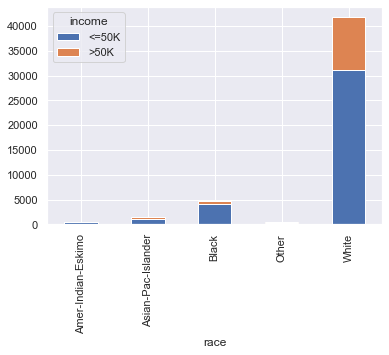

In [32]:
import seaborn as sns
sns.set()
df_plot.T.plot(kind='bar',
               stacked=True)

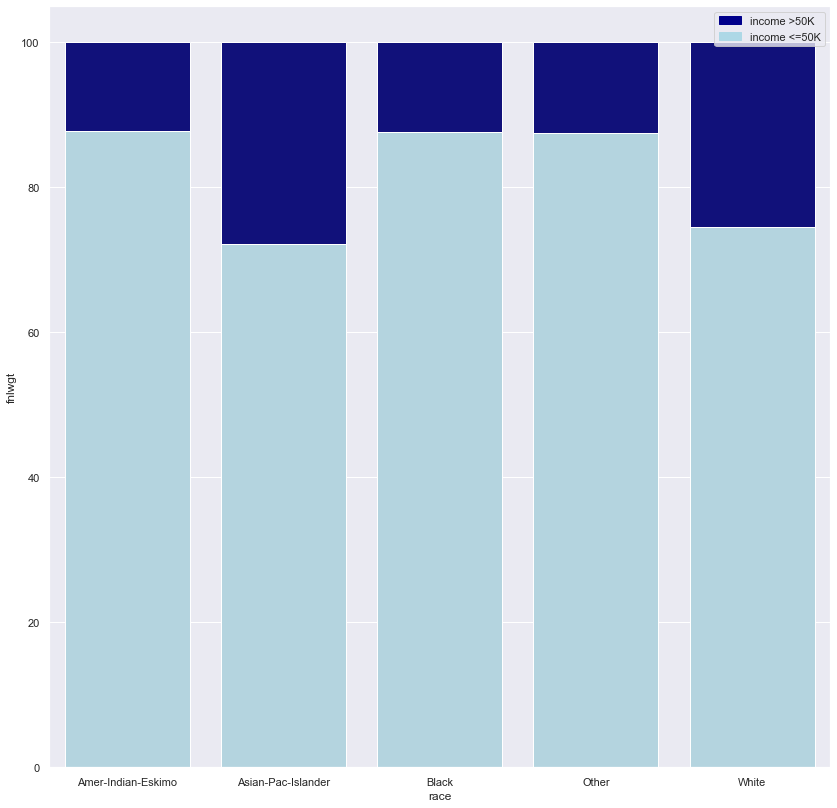

In [33]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = df

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('race')['fnlwgt'].sum().reset_index()
smoker = tips[tips.income=='<=50K'].groupby('race')['fnlwgt'].sum().reset_index()
smoker['fnlwgt'] = [i / j * 100 for i,j in zip(smoker['fnlwgt'], total['fnlwgt'])]
total['fnlwgt'] = [i / j * 100 for i,j in zip(total['fnlwgt'], total['fnlwgt'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="race",  y="fnlwgt", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="race", y="fnlwgt", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='income >50K')
bottom_bar = mpatches.Patch(color='lightblue', label='income <=50K')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

AttributeError: 'Rectangle' object has no property 'order'

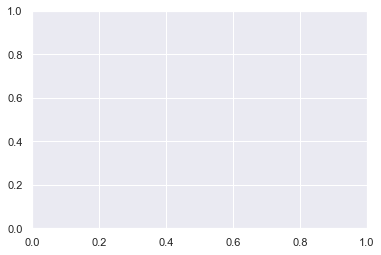

In [34]:
import seaborn as sns
sns.set()
df_plot.T.plot(kind='bar',
               stacked=True,
               order=df_plot.groupby(['income', 'race']).sum())

In [ ]:
ax = df.loc[:, ['income','race']].plot.bar(x=['race','income'], stacked=True)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

In [ ]:
ax = df.plot.bar(stacked=True)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

## 3.6 Summary<a id='3.6_Summary'></a>